# Additional Spectral Domain Measures

These measures are not included in the main analyses, but briefly explored here.

Included measures:
- spectral entropy

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from neurodsp.sim import sim_powerlaw, sim_synaptic_current, sim_combined
from neurodsp.utils import set_random_seed

In [2]:
# Import custom code
import sys; from pathlib import Path
sys.path.append(str(Path('..').resolve()))

from apm.io import APMDB
from apm.run import run_sims
from apm.methods import spectral_entropy
from apm.methods.settings import SP_ENT_PARAMS
from apm.plts.sims import plot_ap_sims, plot_pe_sims
from apm.plts.settings import EXT
from apm.sim.settings import FS, SIM_PARAMS_AP, SIM_PARAMS_COMB, EXPS, FREQS, POWERS, N_SIMS, EXP
from apm.sim.examples import SIG_AP, SIG_KN, SIG_OSC, SIG_COMB

In [ ]:
import seaborn as sns
sns.set_context('talk')

## Settings

In [3]:
# Set data specific settings
SP_ENT_PARAMS['sf'] = FS

In [4]:
# Check Settings
print('Spectral Entropy:\t', SP_ENT_PARAMS)

Spectral Entropy:	 {'sf': 250, 'method': 'fft'}


In [5]:
# Settings for saving figures
SAVE_FIG = False
FIGPATH = APMDB().figs_path / 'XX'

## Spectral Entropy

The spectral entropy measures the entropy of the power spectrum.

In [6]:
print('Computed spectral entropy:')
print('  powerlaw: \t {:1.4f}'.format(spectral_entropy(SIG_AP, **SP_ENT_PARAMS)))
print('  osc:      \t {:1.4f}'.format(spectral_entropy(SIG_OSC, **SP_ENT_PARAMS)))
print('  combined: \t {:1.4f}'.format(spectral_entropy(SIG_COMB, **SP_ENT_PARAMS)))
print('  knee:     \t {:1.4f}'.format(spectral_entropy(SIG_KN, **SP_ENT_PARAMS)))

Computed spectral entropy:
  powerlaw: 	 4.1684
  osc:      	 0.0000
  combined: 	 6.8379
  knee:     	 10.3436


#### Aperiodic Variations

In [7]:
# Run simulations calculating spectral entropy across exponents
sp_sims_exp, sp_sims_exp_var = run_sims(\
    sim_powerlaw, SIM_PARAMS_AP, spectral_entropy, SP_ENT_PARAMS, 
    'update_exp', EXPS, N_SIMS, var_func=np.std)

In [8]:
# Run simulations calculating spectral entropy across exponents, with an oscillation
sp_sims_comb, sp_sims_exp_comb_var = run_sims(\
    sim_combined, SIM_PARAMS_COMB, spectral_entropy, SP_ENT_PARAMS, 
    'update_comb_exp', EXPS, N_SIMS, var_func=np.std)

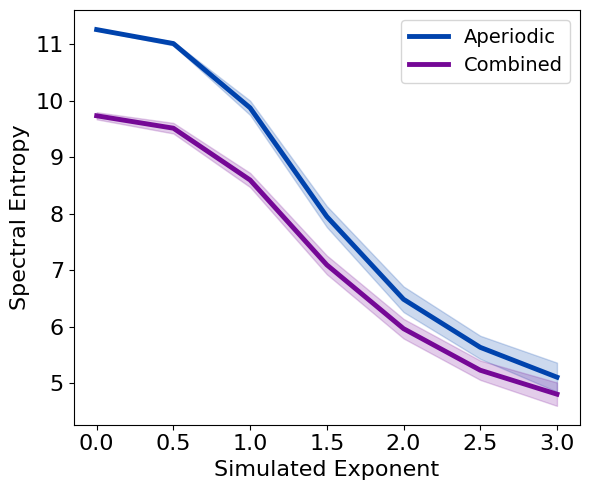

In [9]:
# Plot spectral entropy measures across aperiodic variations
plot_ap_sims(sp_sims_exp, sp_sims_exp_var, sp_sims_comb, sp_sims_exp_comb_var,
             'Spectral Entropy', save_fig=SAVE_FIG, file_name='sp_ap' + EXT, file_path=FIGPATH)

#### Periodic Variations

In [10]:
# Run simulations calculating spectral entropy across oscillation frequency
sp_sims_freq, sp_sims_freq_var = run_sims(\
    sim_combined, SIM_PARAMS_COMB, spectral_entropy, SP_ENT_PARAMS,
    'update_freq', FREQS, N_SIMS, var_func=np.std)

In [11]:
# Run simulations calculating spectral entropy across oscillation power
sp_sims_pow, sp_sims_pow_var = run_sims(\
    sim_combined, SIM_PARAMS_COMB, spectral_entropy, SP_ENT_PARAMS,
    'update_pow', POWERS, N_SIMS, var_func=np.std)

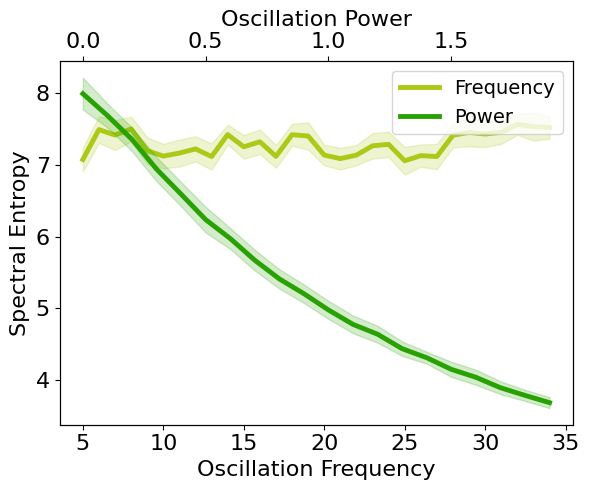

In [12]:
# Plot spectral entropy measures across periodic variations
plot_pe_sims(sp_sims_freq, sp_sims_freq_var, sp_sims_pow, sp_sims_pow_var,
             'Spectral Entropy', save_fig=SAVE_FIG, file_name='sp_pe' + EXT, file_path=FIGPATH)